In [ ]:
conda install -c https://conda.anaconda.org/anaconda pandas-datareader

<div id="Getting Started">
    <h2>Getting Started</h2>

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get th stocks symbols in the portfolio

In [2]:
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'MSFT', 'TSLA', 'NVDA', 'JPM', 'MRNA']

Let's assign some equal weights

In [3]:
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])


Get portfolio starting date:

In [4]:
stockStartDate = '2013-01-01'

Get ending date (today)

In [5]:
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2022-05-26


Create a dataframe to store the adjusted close price of the stock

In [6]:
df = pd.DataFrame()

Store the adjusted close price of the stocks into the df

In [7]:
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

print(df)


                    FB         AMZN        AAPL        NFLX         GOOG  \
Date                                                                       
2013-01-02   28.000000   257.309998   16.914255   13.144286   360.274597   
2013-01-03   27.770000   258.480011   16.700760   13.798571   360.483826   
2013-01-04   28.760000   259.149994   16.235573   13.711429   367.607117   
2013-01-07   29.420000   268.459991   16.140062   14.171429   366.003143   
2013-01-08   29.059999   266.380005   16.183512   13.880000   365.280823   
...                ...          ...         ...         ...          ...   
2022-05-20  193.539993  2151.820068  137.589996  186.350006  2186.260010   
2022-05-23  196.229996  2151.139893  143.110001  187.440002  2233.330078   
2022-05-24  181.279999  2082.000000  140.360001  180.339996  2118.520020   
2022-05-25  183.830002  2135.500000  140.520004  187.830002  2116.790039   
2022-05-26  188.940002  2211.531006  142.514999  189.279999  2158.530029   

           

Visualize show the portfolio

In [8]:
title = 'Portfolio Adj. Close Price History'

Get the stocks

In [9]:
my_stocks = df

Create and plot the graph

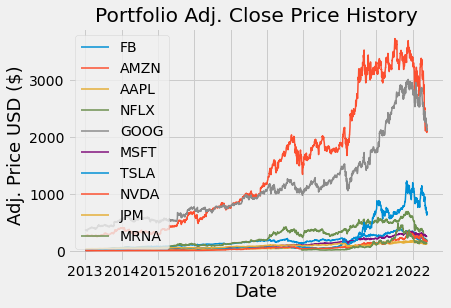

In [10]:
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c, linewidth = 1.5)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

Show the daily simple return

In [11]:
returns = df.pct_change()
print(returns)

                  FB      AMZN      AAPL      NFLX      GOOG      MSFT  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03 -0.008214  0.004547 -0.012622  0.049777  0.000581 -0.013396   
2013-01-04  0.035650  0.002592 -0.027854 -0.006315  0.019760 -0.018716   
2013-01-07  0.022949  0.035925 -0.005883  0.033549 -0.004363 -0.001870   
2013-01-08 -0.012237 -0.007748  0.002692 -0.020565 -0.001974 -0.005245   
...              ...       ...       ...       ...       ...       ...   
2022-05-20  0.011762  0.002535  0.001747  0.015642 -0.012935 -0.002291   
2022-05-23  0.013899 -0.000316  0.040119  0.005849  0.021530  0.032032   
2022-05-24 -0.076186 -0.032141 -0.019216 -0.037879 -0.051408 -0.003952   
2022-05-25  0.014067  0.025696  0.001140  0.041533 -0.000817  0.011170   
2022-05-26  0.027797  0.035603  0.014197  0.007720  0.019719  0.007961   

                TSLA      NVDA       

Show annualized covariance matrix

In [12]:
cov_matrix_annual = returns.cov() * 252
print(cov_matrix_annual)


            FB      AMZN      AAPL      NFLX      GOOG      MSFT      TSLA  \
FB    0.130704  0.060504  0.048230  0.066869  0.054805  0.047231  0.064196   
AMZN  0.060504  0.098599  0.043061  0.068609  0.049906  0.047571  0.062768   
AAPL  0.048230  0.043061  0.081518  0.038873  0.040601  0.045708  0.056459   
NFLX  0.066869  0.068609  0.038873  0.222071  0.051587  0.047377  0.080953   
GOOG  0.054805  0.049906  0.040601  0.051587  0.068025  0.046418  0.050931   
MSFT  0.047231  0.047571  0.045708  0.047377  0.046418  0.069802  0.054707   
TSLA  0.064196  0.062768  0.056459  0.080953  0.050931  0.054707  0.322399   
NVDA  0.069132  0.064697  0.063314  0.073778  0.058354  0.065054  0.088723   
JPM   0.030632  0.024496  0.031216  0.025983  0.030826  0.032659  0.035579   
MRNA  0.044738  0.035164  0.034742  0.049872  0.028380  0.036038  0.066921   

          NVDA       JPM      MRNA  
FB    0.069132  0.030632  0.044738  
AMZN  0.064697  0.024496  0.035164  
AAPL  0.063314  0.031216  0.03

Calculate the portfolio variance

In [13]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print(port_variance)

0.0639856322169573


Calculate the portfolio volatility aka standard deviation

In [14]:
port_volatility = np.sqrt(port_variance)
print(port_volatility)

0.2529538143949549


Calculate the annual portfolio return

In [15]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
print(portfolioSimpleAnnualReturn)

0.3984419768307217


Show the expected annual return, volatility and the variance

In [16]:
percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vol = str(round(port_volatility, 4) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 4) * 100) + '%'

print('Expected annual Return: ' + percent_ret)
print('Annual Volatility: ' + percent_vol)
print('Annual variance: ' + percent_var)

Expected annual Return: 39.839999999999996%
Annual Volatility: 25.3%
Annual variance: 6.4%


Install PyPortfolioOpt

In [18]:
pip install PyPortfolioOpt

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [19]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


<div id="Portfolio Optimization">
    <h2>Portfolio Optimization</h2>

Calculate the expected returns and annualised sample covariance matrix of asset return

In [20]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

Optimize for max sharpe ratio

In [21]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0), ('AMZN', 0.0), ('AAPL', 0.0), ('NFLX', 0.00917), ('GOOG', 0.0), ('MSFT', 0.27606), ('TSLA', 0.23303), ('NVDA', 0.32301), ('JPM', 0.0), ('MRNA', 0.15873)])
Expected annual return: 53.0%
Annual volatility: 33.0%
Sharpe Ratio: 1.55


(0.5304490468002478, 0.3298392421639, 1.5475691838589698)

Get the discrete allocation of each share per stock (USD 30.000,00 budget)

In [22]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=30000)

In [23]:
allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'NFLX': 1, 'MSFT': 31, 'TSLA': 10, 'NVDA': 55, 'MRNA': 36}
Funds remaining: $97.09


C:\Users\andre\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
